# Redes Neurais Convolucionais (CNN)
<font color='blue'>

<br>Conteúdo: 

* [Carregando o Conjunto de Dados](#1)

* [Normalização, Redimensionamento e Codificação de Rótulos](#2)

* [Divisão de Treinamento e Teste](#3)

* [Rede Neural Convolucional](#4)

    * [O que é Operação de Convolução?](#5)

    * [Zero Padding](#6)

    * [AgMax Pooling](#7)

    * [Achatamento](#8)

    * [Conexão Completa](#9)

* [Implementando com Keras](#10)

    * [Criar Modelo](#11)

    * [Definir Otimizador](#12)

    * [Compilar Modelo](#13)

    * [Épocas e Tamanho do Lote](#14)

    * [Aumento de Dados](#15)

    * [Ajustar o Modelo](#16)

    * [Avaliar o Modelo](#17)

In [46]:
!pip install tensorflow
!pip install keras

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="1"></a>
## Carregando o conjunto de dados
* Nesta parte carregamos e visualizamos os dados.

In [51]:
# leia o treinamento
train = pd.read_csv("C:/Users/joaop/OneDrive/Documentos/UFC/Disciplinas/Inteligência Artificial/Deep_Learning/Deep Learning/Deep Learning/CNN/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# leia o teste
test= pd.read_csv("C:/Users/joaop/OneDrive/Documentos/UFC/Disciplinas/Inteligência Artificial/Deep_Learning/Deep Learning/Deep Learning/CNN/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# coloque rótulos na variável y_train
Y_train = train["label"]
# Eliminar coluna 'label'
X_train = train.drop(labels = ["label"],axis = 1) 

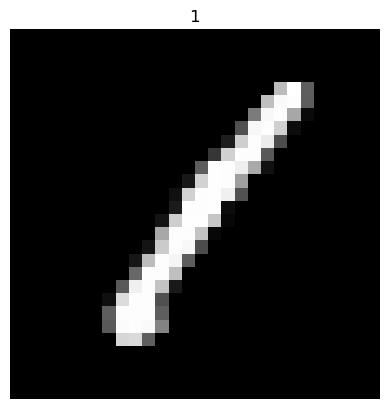

In [55]:
# Plotar algumas amostras
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

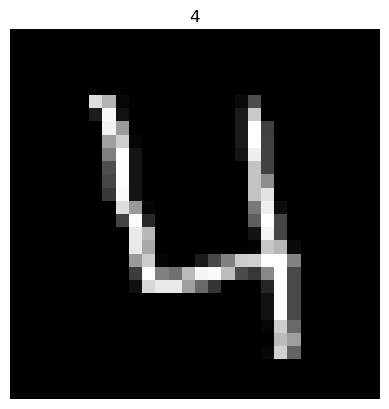

In [59]:
# Plotar algumas amostras
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalização, Redimensionamento e Codificação de Rótulos
* Normalização
* Realizamos uma normalização em escala de cinza para reduzir o efeito das diferenças de iluminação.
* Se realizarmos a normalização, a CNN funciona mais rápido.
* Redimensionar
* Treinar e testar imagens (28 x 28)
* Redimensionamos todos os dados para matrizes 3D de 28x28x1.
* Keras precisa de uma dimensão extra no final que corresponde aos canais. Nossas imagens são em escala de cinza, então usam apenas um canal.
* Codificação de rótulo
* Codificar rótulos via one-hot-encoding
* 2 => [0,0,1,0,0,0,0,0,0,0]
* 4 => [0,0,0,0,1,0,0,0,0,0]

In [62]:
# Normalizar os dados
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [64]:
# Reedimensionar
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [66]:
# Codificação de rótulo
# converter para codificação one-hot
Y_train = pd.get_dummies(Y_train).astype(int)

<a id="3"></a>
## Divisão treino e teste
* Dividimos os dados em conjuntos de treinamento e teste.
* o tamanho do teste é 10%.
* o tamanho do treinamento é 90%.

In [69]:
# Divisão treinamento e validação
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


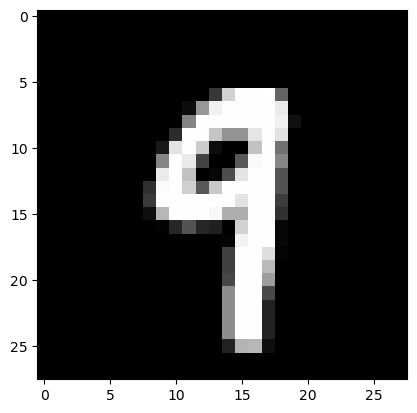

In [71]:
# Alguns exemplos
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="4"></a>
## Rede Neural Convolucional
* CNN é usado para classificação de imagens e detecção de objetos
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### O que é operação de convolução?
* Temos alguns filtros (3*3)
* O filtro não precisa ser uma matriz 3 por 3. Pode ser 5 por 5 ou 7 por 7.
* Detector de características = kernel = filtro
* O filtro detecta características como bordas ou formas convexas. Exemplo, se nossa entrada for um cachorro, o filtro pode detectar características como orelha ou rabo do cachorro.
* mapa de características = conv(imagem de entrada, filtro). Multiplicação de matrizes elemento a elemento.
* mapa de recursos = recurso convoluído
* Stride = deslocamento na imagem de entrada.
* Reduzimos o tamanho da imagem. Isso é importante porque o código roda mais rápido. No entanto, perdemos informações.
* Criamos vários mapas de características porque usamos vários filtros.
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* Depois de ter a camada de convolução, usamos ReLU para quebrar a linearidade. Aumentar a não linearidade. Porque, as imagens são não lineares.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Preenchimento com zeros
* À medida que continuamos aplicando camadas conv, o tamanho do volume diminuirá mais rápido do que gostaríamos. Nas camadas iniciais da nossa rede, queremos preservar o máximo de informações sobre o volume de entrada original para que possamos extrair esses recursos de baixo nível.
* o tamanho de entrada e o tamanho de saída são os mesmos.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* Faz down-sampling ou sub-sampling (Reduz o número de parâmetros)
* Torna a detecção de recursos invariável a mudanças de escala ou orientação.
* Reduz a quantidade de parâmetros e cálculos na rede e, portanto, também controla o overfitting.
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Achatamento (Flattening)
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Conexão Densa
* Os neurônios em uma camada totalmente conectada têm conexões com todas as ativações na camada anterior
* Rede Neural Artificial
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementando com Keras

<a id="11"></a>
### Criar modelo
* conv => max pool => dropout => conv => max pool => dropout => totalmente conectado (2 camadas)
* Dropout: Dropout é uma técnica onde neurônios selecionados aleatoriamente são ignorados durante o treinamento
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [99]:
!pip install pydot

In [103]:
import keras 
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model

model = Sequential()
# 
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# totalmente conectado
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
#plot_model(model, show_shapes=True)

<a id="12"></a>
### Definir Otimizador
* Otimizador Adam: altera a taxa de aprendizagem


In [106]:
# Definindo o otimizador
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

<a id="13"></a>
### Compilar modelo
* Entropia cruzada categórica
* Neste momento usamos entropia cruzada categórica. Isso significa que temos multiclasse.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [109]:
# Compilar o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
### Épocas e tamanho do lote
* Digamos que você tenha um conjunto de dados de 10 exemplos (ou amostras). Você tem um **tamanho de lote** de 2 e especificou que quer que o algoritmo seja executado por 3 **épocas**. Portanto, em cada época, você tem 5 **lotes** (10/2 = 5). Cada lote é passado pelo algoritmo, portanto, você tem 5 iterações **por época**.

In [112]:
epochs = 10  # para melhor resultado aumente as épocas
batch_size = 250

<a id="15"></a>
### Aumento de dados
* Para evitar o problema de overfitting, precisamos expandir artificialmente nosso conjunto de dados de dígitos manuscritos
* Altere os dados de treinamento com pequenas transformações para reproduzir as variações do dígito.
* Por exemplo, o número não está centralizado. A escala não é a mesma (alguns que escrevem com números grandes/pequenos). A imagem está rotacionada.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>



In [115]:
# aumento de dados
datagen = ImageDataGenerator(
        featurewise_center=False,  # definir a média de entrada como 0 no conjunto de dados
        samplewise_center=False,  # defina cada média amostral como 0
        featurewise_std_normalization=False,  # dividir entradas pelo padrão do conjunto de dados
        samplewise_std_normalization=False,  # dividir cada entrada pelo seu padrão
        zca_whitening=False,  # redução de dimensionalidade
        rotation_range=5,  # girar imagens aleatoriamente no intervalo de 5 graus
        zoom_range = 0.1, # Ampliar imagem aleatoriamente em até 10%
        width_shift_range=0.1,  # deslocar aleatoriamente as imagens horizontalmente em 10%
        height_shift_range=0.1,  # deslocar imagens aleatoriamente na vertical em 10%
        horizontal_flip=False,  # inverter imagens aleatoriamente
        vertical_flip=False)  # inverter imagens aleatoriamente

datagen.fit(X_train)

<a id="16"></a>
### Ajuste o modelo

In [118]:
# Treinamento do modelo
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


C:\Users\joaop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.4640 - loss: 1.5535 - val_accuracy: 0.9407 - val_loss: 0.2482
Epoch 2/10
  1/151 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7840 - loss: 0.6177

C:\Users\joaop\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.6177 - val_accuracy: 0.9412 - val_loss: 0.2434
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8410 - loss: 0.4990 - val_accuracy: 0.9614 - val_loss: 0.1358
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 0.4907 - val_accuracy: 0.9617 - val_loss: 0.1362
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8872 - loss: 0.3611 - val_accuracy: 0.9686 - val_loss: 0.1054
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8880 - loss: 0.3297 - val_accuracy: 0.9690 - val_loss: 0.1053
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9101 - loss: 0.2896 - val_accuracy: 0.9719 - val_loss: 0.0941
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.2588 - val_accuracy: 0.9700 - val_loss: 0.0956
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9234 - loss: 0.2412 - val_accuracy: 0.978

<a id="17"></a>
### Avalie o modelo
* Visualização de perda de teste
* Matriz de confusão


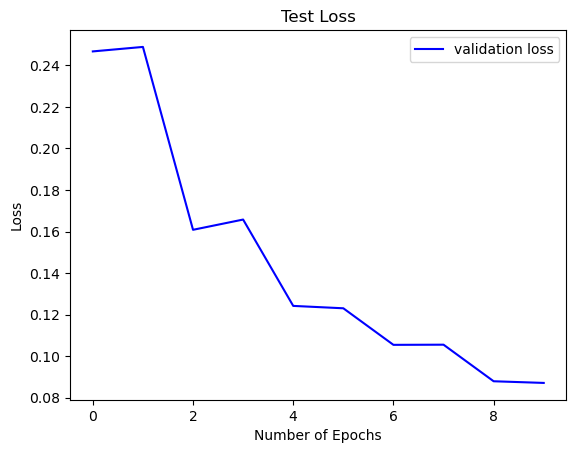

In [22]:
# Trace as curvas de perda e precisão para treinamento e validação
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


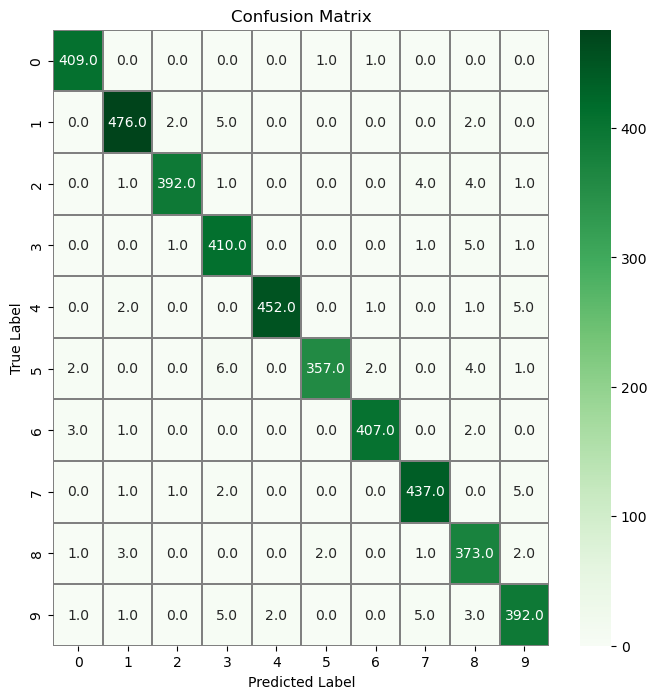

In [121]:
# matriz de confusão
import seaborn as sns
# Prever os valores do conjunto de dados de validação
Y_pred = model.predict(X_val)
# Converter classes de previsões em um vetor one-hot
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Converter observações de validação em vetores one-hot
Y_true = np.argmax(np.array(Y_val),axis = 1) 
# calcular a matriz de confusão
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# traçar a matriz de confusão
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
Y_val

,0,1,2,3,4,5,6,7,8,9
38732,0,0,0,0,0,0,1,0,0,0
3686,0,0,0,0,0,0,0,0,0,1
30090,0,0,0,0,0,1,0,0,0,0
31205,0,0,0,0,0,0,0,1,0,0
11331,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
19094,0,1,0,0,0,0,0,0,0,0
18678,0,1,0,0,0,0,0,0,0,0
3292,0,0,1,0,0,0,0,0,0,0
39228,0,0,1,0,0,0,0,0,0,0


In [25]:
Y_pred_classes

array([6, 9, 5, ..., 2, 8, 0], dtype=int64)

In [27]:
Y_true

NameError: name 'Y_true' is not defined